In [227]:
#Imports
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Single neuron model

Text(0.5, 1.0, 'Single neuron model')

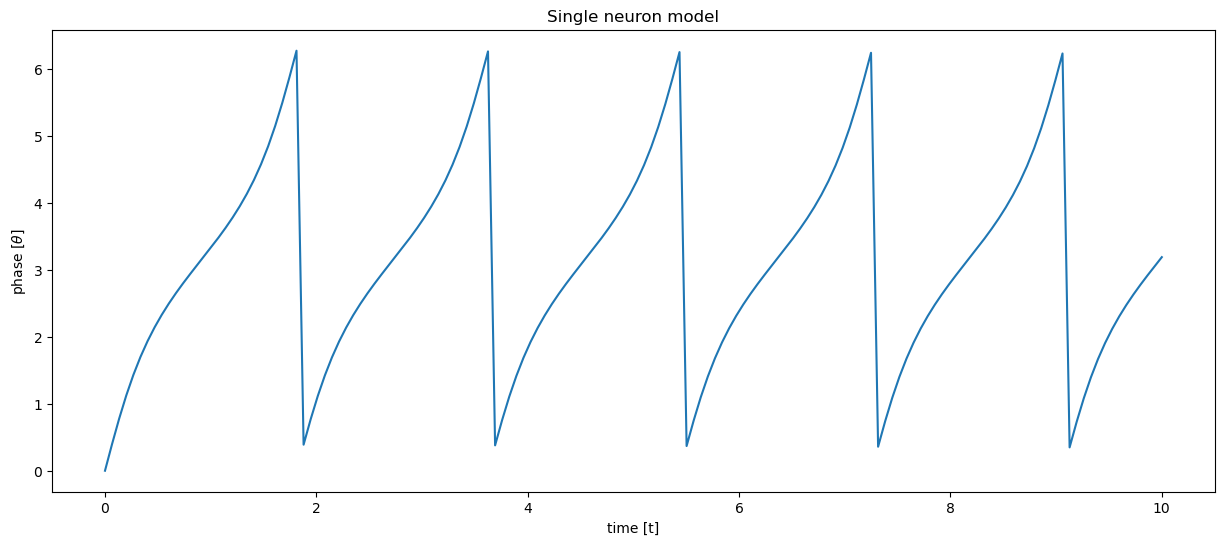

In [228]:
def neuron(y,t,I):
    theta = y
    dydt = (1-np.cos(theta)) + (1+np.cos(theta))*I
    return dydt

I = 3
y0 = 0
t = np.linspace(0,10, 150)
sol = odeint(neuron, y0, t, args=(I,))
sol_mod = np.mod(sol[:,0], 2*np.pi)

#plot
plt.figure(figsize=(15, 6)) 
plt.plot(t, sol_mod)
plt.xlabel('time [t]')
plt.ylabel('phase' + r' [$\theta$]')
plt.title('Single neuron model')

Two neuron model with adaptive coupling

Text(0.5, 1.0, 'Coupled neuron model')

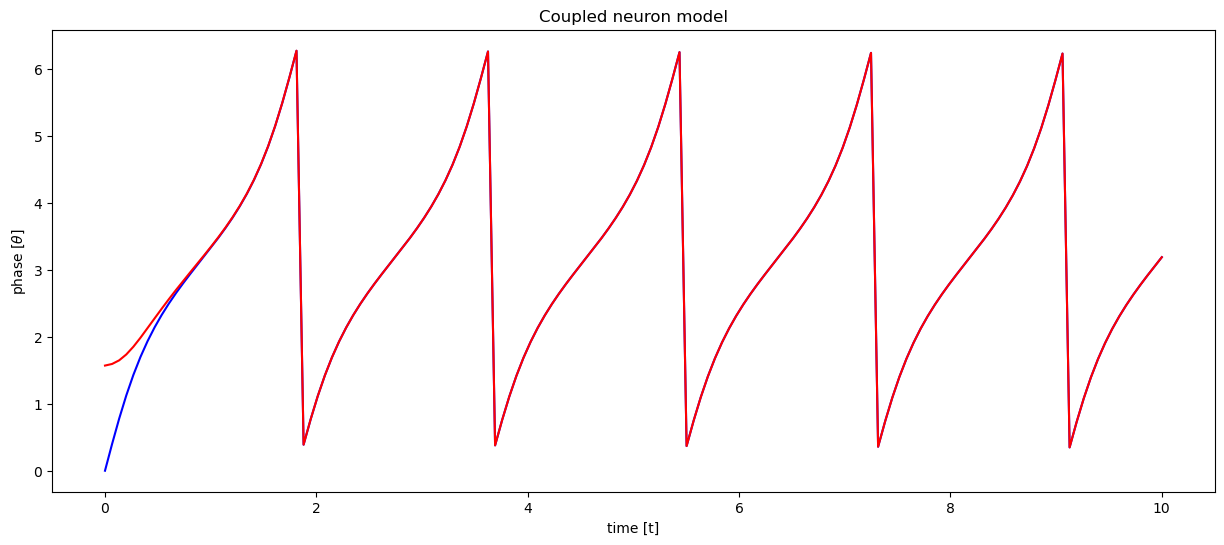

In [229]:
def neuron_adaptive(y,t,I):
    theta_1, theta_2 = y
    dydt = [(1-np.cos(theta_1)) + (1+np.cos(theta_1))*I, (1-np.cos(theta_2)) + (1+np.cos(theta_2))*(I-4*(1/(1+np.cos(theta_2)))*(theta_2-theta_1) + (theta_2 - theta_1)**2)]
    return dydt

y0 = [0, np.pi/2]
I=3
sol = odeint(neuron_adaptive, y0, t, args=(I,))
sol_mod_1 = np.mod(sol[:,0], 2*np.pi)
sol_mod_2 = np.mod(sol[:,1], 2*np.pi)


#plot
plt.figure(figsize=(15, 6)) 
plt.plot(t, sol_mod_1,'b', label='neuron 1')
plt.plot(t, sol_mod_2,'r', label='neuron 2')
plt.xlabel('time [t]')
plt.ylabel('phase' + r' [$\theta$]')
plt.title('Coupled neuron model')

Two neuron model error dynamics

Text(0.5, 1.0, 'Error dynamics')

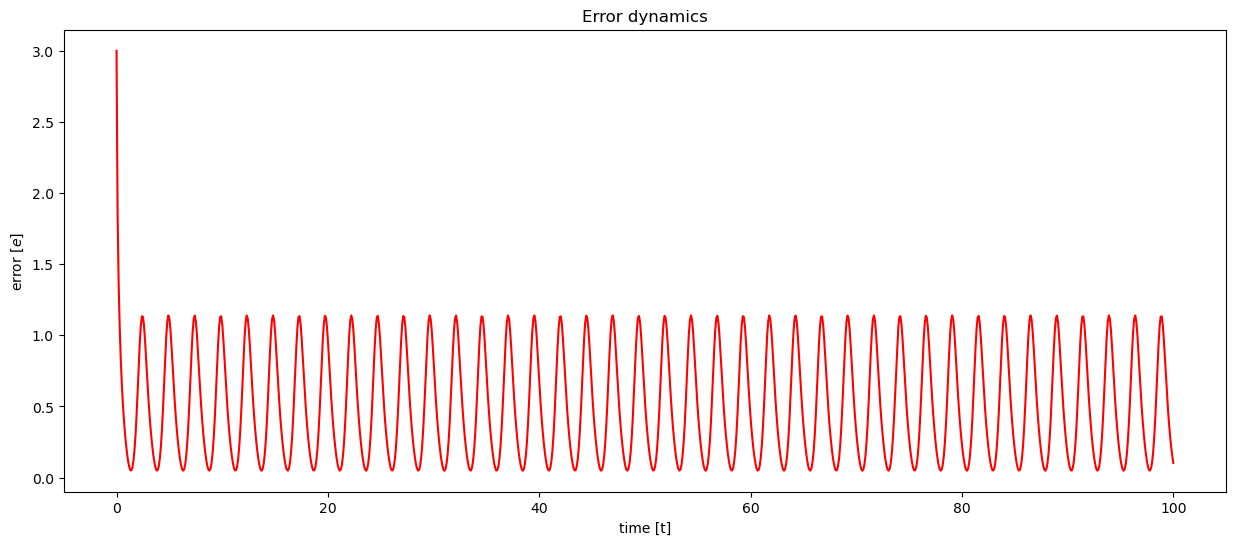

In [230]:
def adaptive_neuron_error(y,t,I):
    theta, e = y
    dydt = [(1-np.cos(theta)) + (1+np.cos(theta))*(1+np.tanh(e)), (1-I)*(np.cos(theta-e)-np.cos(theta)) + (1+np.cos(theta))*(I-4*(1/(1+np.cos(theta)))*e - e**2)]
    return dydt

t = np.linspace(0,100,1000)
y0 = [0,I]
sol = odeint(adaptive_neuron_error, y0, t, args=(I,))
sol_err = sol[:,1]

#plot
plt.figure(figsize=(15, 6)) 
plt.plot(t, sol_err,'r')
plt.xlabel('time [t]')
plt.ylabel('error' + r' [$e$]')
plt.title('Error dynamics')